<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/Time_series_forecasting_with_Darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting with [Darts](https://unit8co.github.io/darts/)



![picture](https://github.com/unit8co/darts/raw/master/static/images/darts-logo-trim.png)

1. Time series forecasting
2. Statistical methods
  *   Autoregressive integrated moving average (ARIMA)
  *   Prophet
3. Deep learning methods
  *   Transformer
  *   Informer
  *   Temporal Fusion Transformers (TFT)
  *   Temporal Convolutional Network Model (TCN)



[1] Lim, Bryan, et al. "Temporal fusion transformers for interpretable multi-horizon time series forecasting." International Journal of Forecasting 37.4 (2021): 1748-1764. \
[2] Zhou, Haoyi, et al. "Informer: Beyond efficient transformer for long sequence time-series forecasting." Proceedings of the AAAI conference on artificial intelligence. Vol. 35. No. 12. 2021. \
[3] Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Lukasz Kaiser, and Illia Polosukhin, “Attention Is All You Need”, 2017. In Advances in Neural Information Processing Systems, pages 6000-6010. https://arxiv.org/abs/1706.03762. \
[4] Taylor, Sean J., and Benjamin Letham. "Forecasting at scale." The American Statistician 72.1 (2018): 37-45.

# Install

1. Details about how to install darts for specific models
2. https://github.com/unit8co/darts/blob/master/INSTALL.md

In [ ]:
!pip install "u8darts[torch]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.0/785.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.

# Dataset

1. [Electricity Transformer Dataset (ETDataset)](https://github.com/zhouhaoyi/ETDataset/tree/main)

Predicting electric power demand for a specific area is a challenging task, and any inaccurate prediction can result in significant costs for the electric power company. However, an alternative strategy involves predicting the safety of transformer oil, allowing the company to avoid unnecessary expenses.


Thus, the authors from ETDataset collect data during about two years and build a dataset whose focus is predict Transfomers oil temperature.



### 1 Loading



In [ ]:
!git clone https://github.com/zhouhaoyi/ETDataset

fatal: destination path 'ETDataset' already exists and is not an empty directory.




*   **HUFL**:	High UseFul Load
*   **HULL**: High UseLess Load
*   **MUFL**:	Middle UseFul Load
*   **MULL**:	Middle UseLess Load
*   **LUFL**:	Low UseFul Load
*   **LULL**:	Low UseLess Load
*   **OT**:   Oil Temperature (target)



In [ ]:
import pandas as pd

df = pd.read_csv('ETDataset/ETT-small/ETTh1.csv')

df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [ ]:
df.index

RangeIndex(start=0, stop=17420, step=1)

In [ ]:
df = df.drop(columns=['date'])

In [ ]:
df['HUFL'].tolist()

[5.827000141143799,
 5.692999839782715,
 5.1570000648498535,
 5.090000152587892,
 5.357999801635742,
 5.625999927520752,
 7.166999816894531,
 7.434999942779541,
 5.559000015258789,
 4.554999828338623,
 4.956999778747559,
 5.760000228881836,
 4.689000129699707,
 4.689000129699707,
 5.090000152587892,
 5.090000152587892,
 4.2199997901916495,
 4.75600004196167,
 5.625999927520752,
 5.492000102996826,
 5.357999801635742,
 5.090000152587892,
 4.822999954223633,
 4.622000217437744,
 5.223999977111816,
 5.1570000648498535,
 5.1570000648498535,
 5.1570000648498535,
 4.554999828338623,
 5.425000190734863,
 5.492000102996826,
 5.625999927520752,
 5.559000015258789,
 5.223999977111816,
 9.913000106811523,
 11.788000106811523,
 9.645000457763672,
 10.381999969482422,
 8.77400016784668,
 10.449000358581545,
 9.845999717712402,
 9.913000106811523,
 10.649999618530272,
 10.11400032043457,
 9.979999542236328,
 9.3100004196167,
 9.444000244140623,
 9.444000244140623,
 10.381999969482422,
 9.77900028228

### Building TimeSeries dataset

1. Darts implements a TimeSeries class to represent univariate and multivariate time series datasets
2. https://unit8co.github.io/darts/userguide/timeseries.html
3. [from_dataframe](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.from_dataframe)
5. Main parameters:
  *   **time_col** parameter defines the dataset index. If it is None, the darts will use the df.index column
  *   **value_cols** list os strings having the DataFrame columns names to be used as features
  *   **freq** we must set it as **pd.DateOffset** or **int** if our df.index (or time_col) is pd.DatetimeIndex or pd.RangeIndex, respectively.


In [ ]:
df.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [ ]:
# Load the time series dataset
from darts import TimeSeries

ts_darts = TimeSeries.from_dataframe(df=df) #no time_col neither value_cols

In [ ]:
type(ts_darts)

darts.timeseries.TimeSeries

In [ ]:
ts_darts

<TimeSeries (DataArray) (time: 17420, component: 7, sample: 1)>
array([[[ 5.82700014],
        [ 2.00900006],
        [ 1.59899998],
        ...,
        [ 4.20300007],
        [ 1.34000003],
        [30.53100014]],

       [[ 5.69299984],
        [ 2.07599998],
        [ 1.49199998],
        ...,
        [ 4.1420002 ],
        [ 1.37100005],
        [27.78700066]],

       [[ 5.15700006],
        [ 1.74100006],
        [ 1.27900004],
        ...,
...
        ...,
        [ 3.71600008],
        [ 1.523     ],
        [10.27099991]],

       [[ 9.24300003],
        [ 3.81800008],
        [ 5.47200012],
        ...,
        [ 3.65499997],
        [ 1.43200004],
        [ 9.77799988]],

       [[10.11400032],
        [ 3.54999995],
        [ 6.18300009],
        ...,
        [ 3.71600008],
        [ 1.46200001],
        [ 9.56700039]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 ... 17414 17415 17416 17417 17418 17419
  * component  (component) object 'HUFL' 'HULL' 'MUFL' 'MULL' 'LUFL' 'LULL' 'OT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

#### Split the time series dataset between training and validation set



*   [split_before](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.split_before)
*   [split_after](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.split_after)
*   both functions returns in the same order following the TimeSeries index (First slice (recent data), second slice (old data))



In [ ]:
train, val = ts_darts.split_before(0.7)
type(train), type(val)

(darts.timeseries.TimeSeries, darts.timeseries.TimeSeries)

<Axes: xlabel='time'>

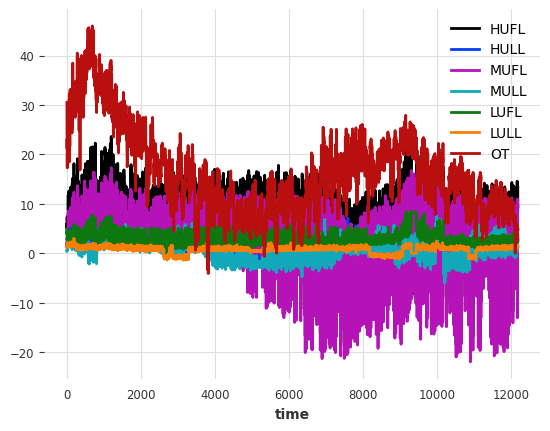

In [ ]:
#train[['HUFL', 'MUFL']].plot()
train.plot()

<Axes: xlabel='time'>

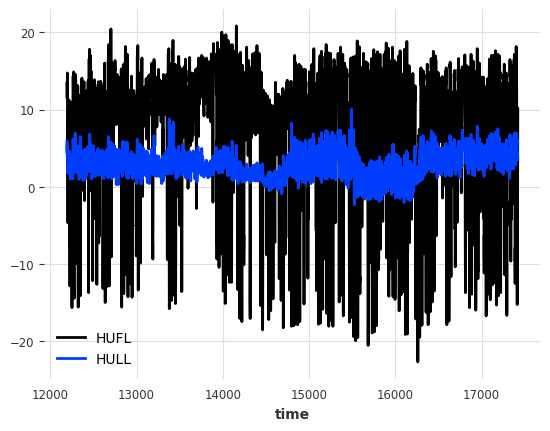

In [ ]:
val.plot(max_nr_components=2)

#### Drop columns of the dataset

* [TimeSeries.drop_columns(list_of_cols)](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.drop_columns)
* Returns a new TimeSeries data set instance without the *list_of_cols* features
* Other drop functions
  * [drop_after](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.drop_after)
  * [drop_before](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.drop_before)

<Axes: xlabel='time'>

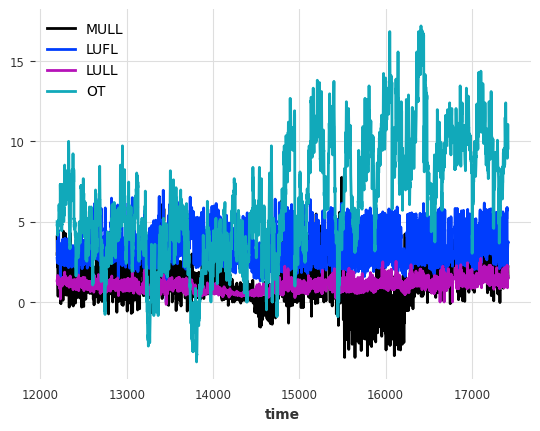

In [ ]:
ALL_COLS = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']

val.drop_columns(ALL_COLS[:3]).plot()

### Preprocessing dataset

1. transformers.Scaler is just a wrapper class for using scalers on time series
2. We must set the scaler which will transform the data
2. Fitting the scaler module

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from darts.dataprocessing.transformers import Scaler

# Normalize the time series (avoid fit on the validation set)
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
#scaler_minmax = StandardScaler()

scaler_transformer = Scaler(scaler=scaler_minmax)

train_transformed = scaler_transformer.fit_transform(train)

val_transformed = scaler_transformer.transform(val)

# Define Model

In [ ]:
import darts

print(darts.__version__)

0.26.0


#### [Transformer Model](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.transformer_model.html#darts.models.forecasting.transformer_model.TransformerModel)



*   pl_trainer_kwargs (Important to set CPU and GPU)
*   force_reset (If set to True, removes old model checkpoints with the same name)



In [ ]:
import torch
from darts.models.forecasting.transformer_model import TransformerModel

input_chunk_length = 50
output_chunk_length = 20
device = "cuda"

loss = torch.nn.MSELoss(
      size_average=None,
      reduce=None,
      reduction='mean'
      )

tm = TransformerModel(
  input_chunk_length=input_chunk_length,
  output_chunk_length=output_chunk_length,
  model_name='multivariate-transformers',
  batch_size=16,
  save_checkpoints=True,
  force_reset=True,
  loss_fn=loss,
  d_model=64,
  nhead=1,
  num_encoder_layers=2,
  num_decoder_layers=2,
  dim_feedforward=512,
  pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}
  )

In [ ]:
model = tm.fit(
    [train_transformed],
    val_series=val_transformed,
    epochs=10,
    verbose=True
    )

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
best_model = TransformerModel.load_from_checkpoint(
            model_name='multivariate-transformers',
            best=True
        )

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# Evaluate



*   Mean Absolute Error ([MAE](https://unit8co.github.io/darts/generated_api/darts.metrics.metrics.html#darts.metrics.metrics.mae))
*   Mean Squared Error ([MSE](https://unit8co.github.io/darts/generated_api/darts.metrics.metrics.html#darts.metrics.metrics.mse))
*   Root Mean Squared Error ([RMSE](https://unit8co.github.io/darts/generated_api/darts.metrics.metrics.html#darts.metrics.metrics.rmse))



In [ ]:
from tqdm.notebook import tqdm
import numpy as np
from darts.metrics import mape, marre, mase, mse, rmse, mae

def evaluate_model(val_transformed, model, seq_len, pred_len):
    metrics_resume = {
        'MSE':[],
        'RMSE':[],
        'MAE':[],
    }

    cont_steps = 0

    for i in tqdm(range(0, len(val_transformed), seq_len)):
        try:
            print('History/Input:', i, i + seq_len)
            input_ts = val_transformed[i:(i + seq_len)]
            target_ts = val_transformed[(i + seq_len):(i + seq_len + pred_len)]
            print('Future/Target:', i + seq_len, i + seq_len + pred_len)

            forecast = model.predict(pred_len, series=input_ts, verbose=False)

            metrics_resume['MSE'].append(mse(target_ts, forecast))
            metrics_resume['RMSE'].append(rmse(target_ts, forecast))
            metrics_resume['MAE'].append(mae(target_ts, forecast))

            #print('TARGET:')
            #print('\t', target_ts.values())
            #print('FORECAST:')
            #print('\t', forecast.values())
            #print()

        except Exception as e:
            print(e)

    for k in metrics_resume.keys():
        metrics_resume[k] = float(np.array(metrics_resume[k]).mean())

    for k in metrics_resume.keys():
        print(k, metrics_resume[k])


    return metrics_resume

In [ ]:
import logging

logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)

evaluate_model(
    val_transformed=val_transformed,
    model=best_model,
    seq_len=input_chunk_length,
    pred_len=output_chunk_length
)

  0%|          | 0/105 [00:00<?, ?it/s]

History/Input: 0 50
Future/Target: 50 70
History/Input: 50 100
Future/Target: 100 120
History/Input: 100 150
Future/Target: 150 170
History/Input: 150 200
Future/Target: 200 220
History/Input: 200 250
Future/Target: 250 270
History/Input: 250 300
Future/Target: 300 320
History/Input: 300 350
Future/Target: 350 370
History/Input: 350 400
Future/Target: 400 420
History/Input: 400 450
Future/Target: 450 470
History/Input: 450 500
Future/Target: 500 520
History/Input: 500 550
Future/Target: 550 570
History/Input: 550 600
Future/Target: 600 620
History/Input: 600 650
Future/Target: 650 670
History/Input: 650 700
Future/Target: 700 720
History/Input: 700 750
Future/Target: 750 770
History/Input: 750 800
Future/Target: 800 820
History/Input: 800 850
Future/Target: 850 870
History/Input: 850 900
Future/Target: 900 920
History/Input: 900 950
Future/Target: 950 970
History/Input: 950 1000
Future/Target: 1000 1020
History/Input: 1000 1050
Future/Target: 1050 1070
History/Input: 1050 1100
Future/T

ERROR:main_logger:ValueError: All input series must have length >= `input_chunk_length` (50).


History/Input: 5200 5250
Future/Target: 5250 5270
All input series must have length >= `input_chunk_length` (50).
MSE 0.008188236612876994
RMSE 0.0796714568730573
MAE 0.06406796839784104


{'MSE': 0.008188236612876994,
 'RMSE': 0.0796714568730573,
 'MAE': 0.06406796839784104}